<a href="https://colab.research.google.com/github/royn5618/AILearningPath.io/blob/master/Garments_worker_productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees?select=garments_worker_productivity.csv

In [1]:
'''
!pip install -q kaggle
!pip install -q kaggle-cli
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Kaggle/kaggle.json" ~/.kaggle/ #Mount GDrive
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json
# For competition datasets
#!kaggle competitions download -c dataset_name -p download_to_folder
# For other datasets
!kaggle datasets download -d ishadss/productivity-prediction-of-garment-employees -p dataset
'''

'\n!pip install -q kaggle\n!pip install -q kaggle-cli\n!mkdir -p ~/.kaggle\n!cp "/content/drive/My Drive/Kaggle/kaggle.json" ~/.kaggle/ #Mount GDrive\n!cat ~/.kaggle/kaggle.json \n!chmod 600 ~/.kaggle/kaggle.json\n# For competition datasets\n#!kaggle competitions download -c dataset_name -p download_to_folder\n# For other datasets\n!kaggle datasets download -d ishadss/productivity-prediction-of-garment-employees -p dataset\n'

## Context

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories

## Content

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

Acknowledgements
Relevant Papers:

[1] Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). Deep Neural Network Approach for Predicting the Productivity of Garment Employees. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT). [Web Link]

[2] Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. [Web Link]

## Inspiration

This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

## Task Details

It is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories.




## About this file
## Attribute Information:

01 date : Date in MM-DD-YYYY

02 day : Day of the Week

03 quarter : A portion of the month. A month was divided into four quarters

04 department : Associated department with the instance

05 teamno : Associated team number with the instance 

06 noofworkers : Number of workers in each team 

07 noofstylechange : Number of changes in the style of a particular product

08 targetedproductivity : Targeted productivity set by the Authority for each team for each day. 

09 smv : Standard Minute Value, it is the allocated time for a task 

10 wip : Work in progress. Includes the number of unfinished items for products 

11 overtime : Represents the amount of overtime by each team in minutes

12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13 idletime : The amount of time when the production was interrupted due to several reasons 

14 idlemen : The number of workers who were idle due to production interruption

15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

## EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.shape

(1197, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

There are mising values in wip column

In [6]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [7]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


## Dropping 'wip' Column

Among 1197 records# there are 506 null values in this column

Comment - How else can you handle missing value for WIP? Can you make this into a categorical column which says WIP or not?

In [8]:
np.nanmedian(df['wip'])

1039.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


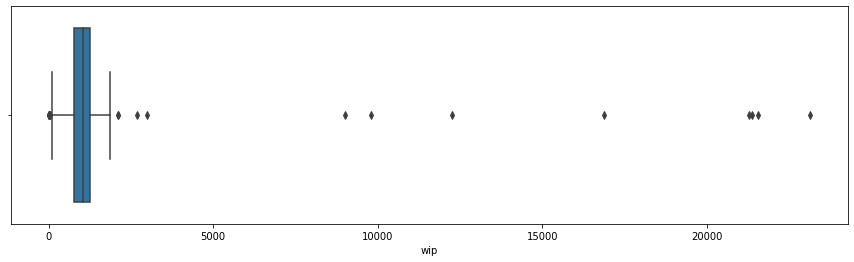

In [9]:
plt.figure(figsize=(15,4))
sns.boxplot(df.wip)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


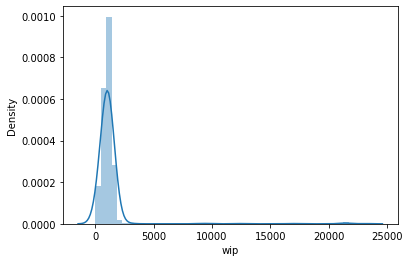

In [10]:
sns.distplot(df.wip)

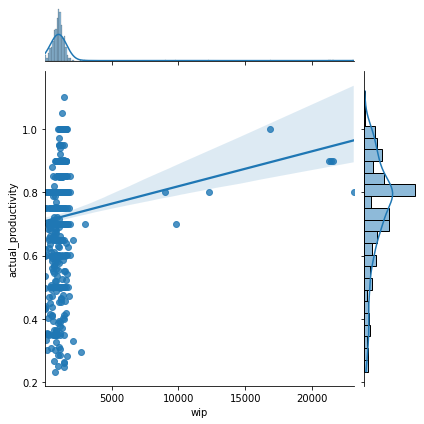

In [11]:
sns.jointplot(x='wip',y='actual_productivity',data=df,kind='reg')



I am not sure which is the right option, dropping or eliminating outliers?

- Comment: You can try scaling but don't just handle it right now. Just observe and take actions later. This is EDA. Next step would be pre processing.

Comment: Use plt.show() to get rid of the object print like this <seaborn.axisgrid.JointGrid at 0x7fd35a85f950>


In [12]:
df_1=df.drop(columns='wip')

# Checking values and distributions in the columns

# 1-Quarter

In [13]:
#quarter,department,day,team are ordinal values

df_1['quarter'].value_counts()
# quarter 1, quarter 2, quarter 3, quarter 4, quarter 5 
#not evenly distributed

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

# 2-Department

In [14]:
df_1.department.value_counts() # sweing, finishing and finishing but we need to collect them into two group

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [15]:
#Replace a single value with a new value for an entire DataFrame:

#df = df.replace(['old value'],'new value')
df_1=df.replace(['finishing '], ['finishing'])

#df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )    
df_1.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

# 3-Day

In [16]:
df_1.day.value_counts() #friday is not a working day

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

# 4-Team

In [17]:
df_1.team.value_counts() #there are 12 teams

8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

# 5-Targeted Productivity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


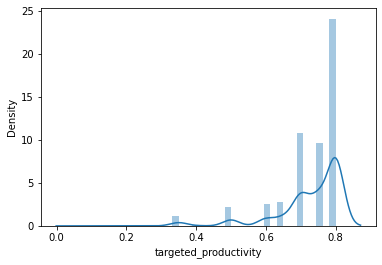

In [18]:
sns.distplot(df_1['targeted_productivity'])

In [19]:
df_1.targeted_productivity.value_counts()
# can be 0.07 a targeted productivity value? How can I identify if it is outlier? 

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

What additional graphs can be used to better evaluate target productivity?

# 6-SMV

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


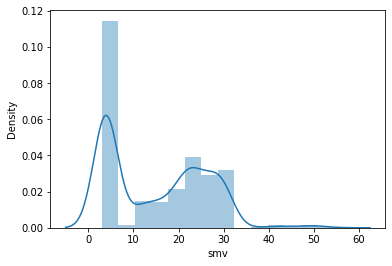

In [20]:
#smv : Standard Minute Value, it is the allocated time for a task
sns.distplot(df_1.smv)

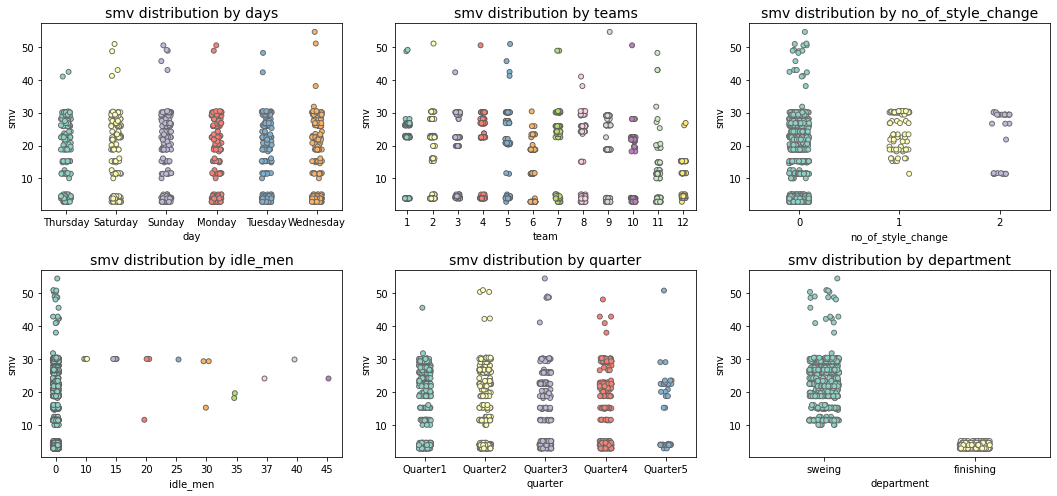

In [21]:
plt.figure(figsize=(15, 7))
palette='Set3'

plt.subplot(2, 3, 1)
sns.stripplot(x = 'day', y = 'smv', data = df_1,linewidth = 0.9, palette = palette)
plt.title('smv distribution by days',fontsize= 14)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'team', y = 'smv', data = df_1,linewidth = 0.9, palette = palette)
plt.title('smv distribution by teams',fontsize= 14)


plt.subplot(2, 3, 3)
sns.stripplot(x = 'no_of_style_change', y = 'smv', data = df_1,linewidth = 0.9, palette = palette)
plt.title('smv distribution by no_of_style_change',fontsize= 14)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'idle_men', y = 'smv', data = df_1,linewidth = 0.9, palette = palette)
plt.title('smv distribution by idle_men',fontsize= 14)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'quarter', y = 'smv', data = df_1,linewidth = 0.9, palette = palette)
plt.title('smv distribution by quarter',fontsize= 14)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'department', y = 'smv', data = df_1,linewidth = 0.9, palette = palette)
plt.title('smv distribution by department',fontsize= 14)

plt.tight_layout()

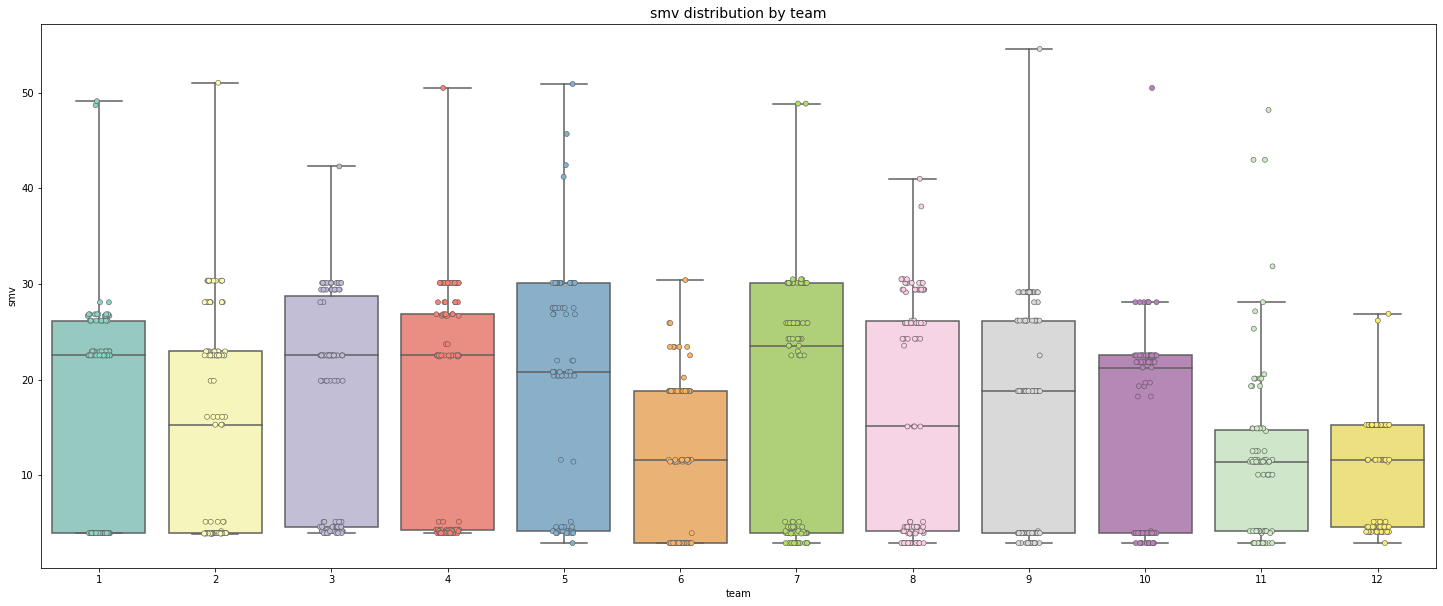

In [22]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'smv', data = df_1,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'team', y = 'smv', data = df_1,
     linewidth = 0.6, palette = palette)
plt.title('smv distribution by team',fontsize= 14)
plt.show()

I have 4 different graphs for smv value prepared but I couldnt understand exactly the meaning of them.

# 7-Over Time

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


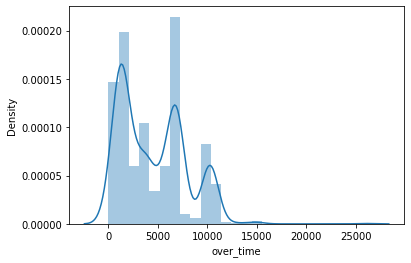

In [23]:
sns.distplot(df_1.over_time)

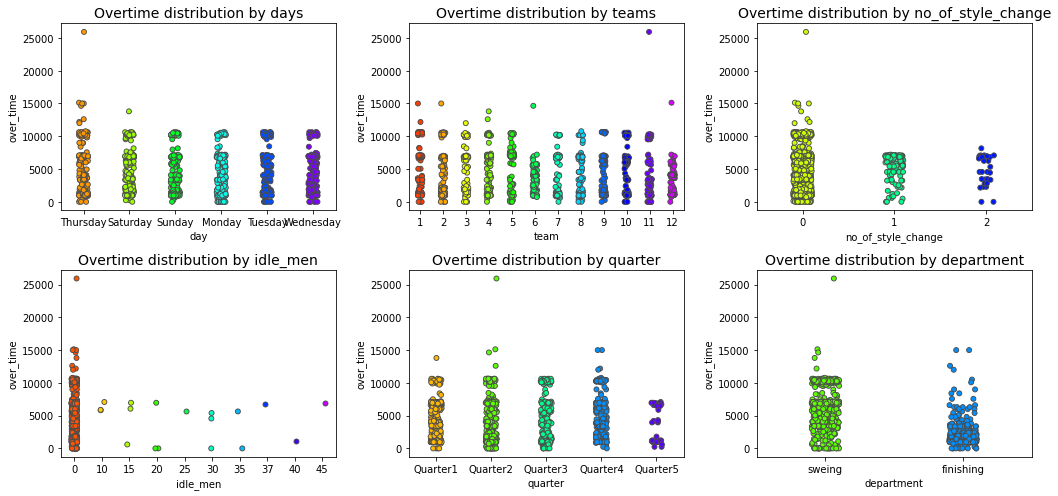

In [24]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(2, 3, 1)
sns.stripplot(x = 'day', y = 'over_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('Overtime distribution by days',fontsize= 14)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'team', y = 'over_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('Overtime distribution by teams',fontsize= 14)


plt.subplot(2, 3, 3)
sns.stripplot(x = 'no_of_style_change', y = 'over_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('Overtime distribution by no_of_style_change',fontsize= 14)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'idle_men', y = 'over_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('Overtime distribution by idle_men',fontsize= 14)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'quarter', y = 'over_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('Overtime distribution by quarter',fontsize= 14)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'department', y = 'over_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('Overtime distribution by department',fontsize= 14)

plt.tight_layout()

What additional graphs can be used to better evaluate target productivity?

# 8-Incentive

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


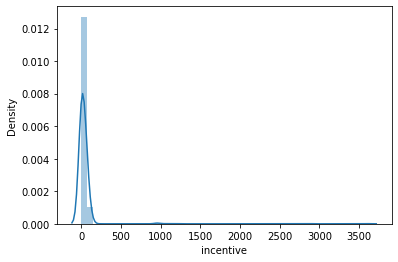

In [25]:
sns.distplot(df_1.incentive)

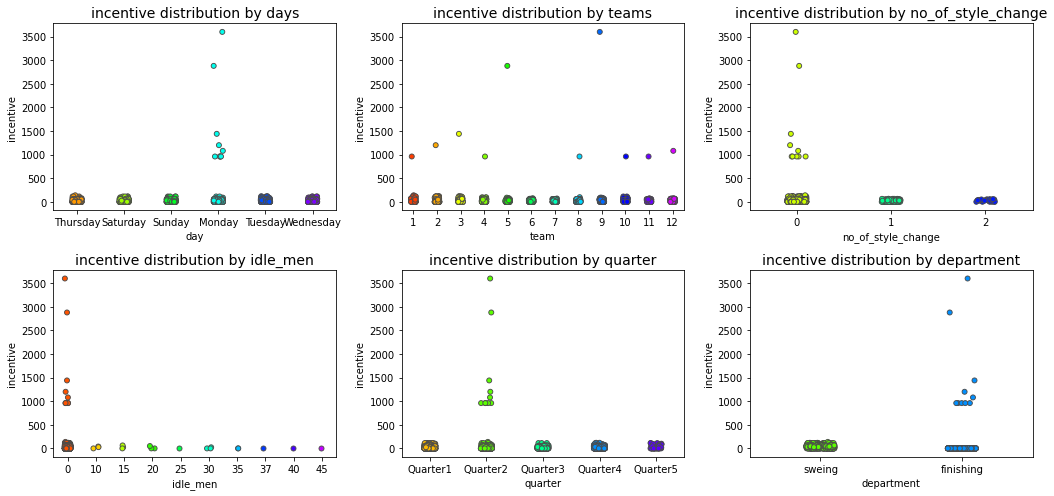

In [26]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(2, 3, 1)
sns.stripplot(x = 'day', y = 'incentive', data = df_1,linewidth = 0.9, palette = palette)
plt.title('incentive distribution by days',fontsize= 14)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'team', y = 'incentive', data = df_1,linewidth = 0.9, palette = palette)
plt.title('incentive distribution by teams',fontsize= 14)


plt.subplot(2, 3, 3)
sns.stripplot(x = 'no_of_style_change', y = 'incentive', data = df_1,linewidth = 0.9, palette = palette)
plt.title('incentive distribution by no_of_style_change',fontsize= 14)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'idle_men', y = 'incentive', data = df_1,linewidth = 0.9, palette = palette)
plt.title('incentive distribution by idle_men',fontsize= 14)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'quarter', y = 'incentive', data = df_1,linewidth = 0.9, palette = palette)
plt.title('incentive distribution by quarter',fontsize= 14)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'department', y = 'incentive', data = df_1,linewidth = 0.9, palette = palette)
plt.title('incentive distribution by department',fontsize= 14)

plt.tight_layout()

# 9-Idle-Time

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


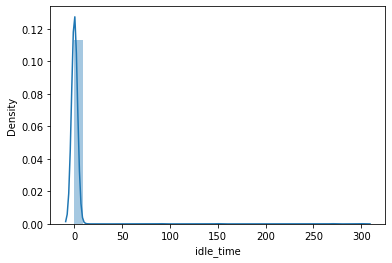

In [27]:
sns.distplot(df_1['idle_time'])

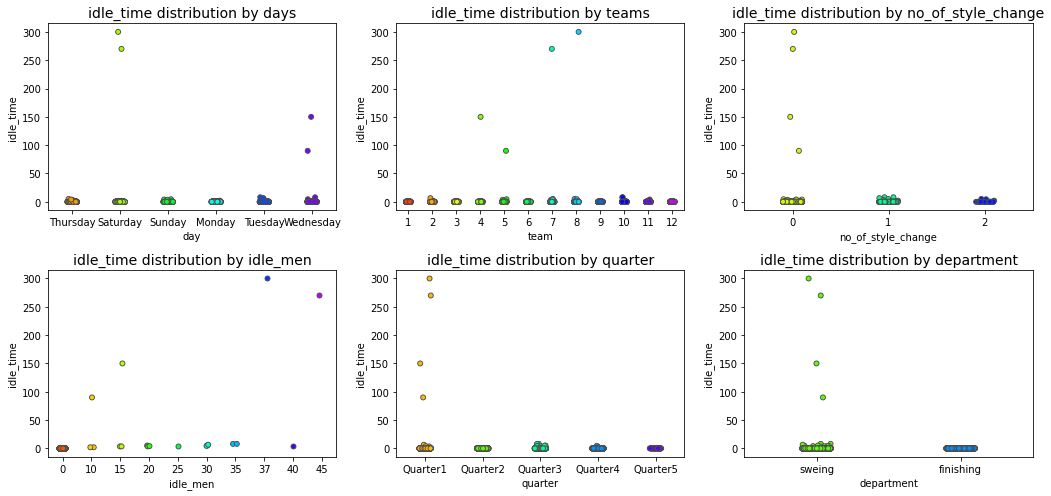

In [28]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(2, 3, 1)
sns.stripplot(x = 'day', y = 'idle_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('idle_time distribution by days',fontsize= 14)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'team', y = 'idle_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('idle_time distribution by teams',fontsize= 14)


plt.subplot(2, 3, 3)
sns.stripplot(x = 'no_of_style_change', y = 'idle_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('idle_time distribution by no_of_style_change',fontsize= 14)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'idle_men', y = 'idle_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('idle_time distribution by idle_men',fontsize= 14)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'quarter', y = 'idle_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('idle_time distribution by quarter',fontsize= 14)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'department', y = 'idle_time', data = df_1,linewidth = 0.9, palette = palette)
plt.title('idle_time distribution by department',fontsize= 14)

plt.tight_layout()

# 10-Idle-Men

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


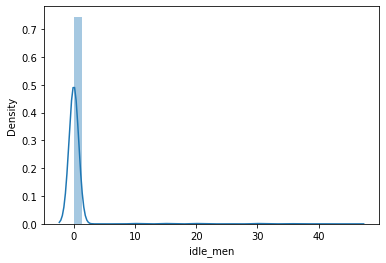

In [29]:
sns.distplot(df_1['idle_men'])

# 11-No_Of_Style_Change

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


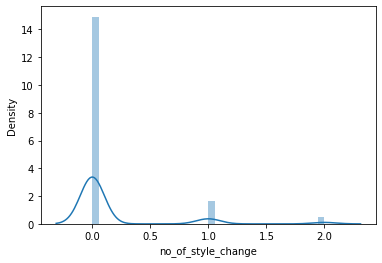

In [30]:
sns.distplot(df_1['no_of_style_change'])

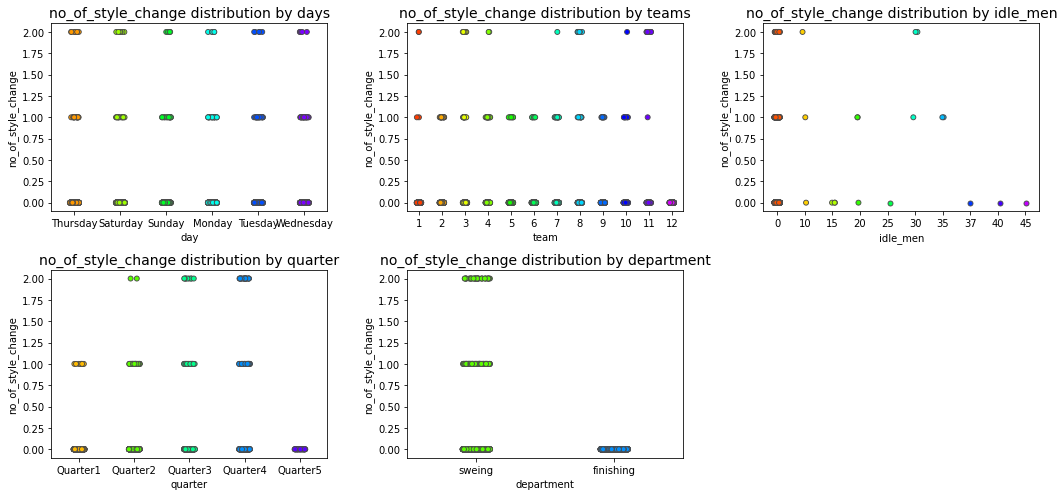

In [31]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(2, 3, 1)
sns.stripplot(x = 'day', y = 'no_of_style_change', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_style_change distribution by days',fontsize= 14)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'team', y = 'no_of_style_change', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_style_change distribution by teams',fontsize= 14)

plt.subplot(2, 3, 3)
sns.stripplot(x = 'idle_men', y = 'no_of_style_change', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_style_change distribution by idle_men',fontsize= 14)

plt.subplot(2, 3, 4)
sns.stripplot(x = 'quarter', y = 'no_of_style_change', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_style_change distribution by quarter',fontsize= 14)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'department', y = 'no_of_style_change', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_style_change distribution by department',fontsize= 14)

plt.tight_layout()

# 12-No_Of_Workers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


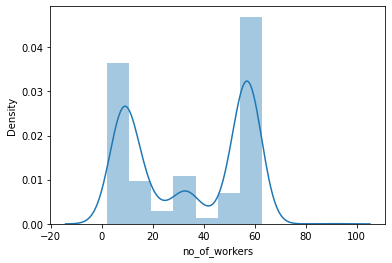

In [32]:
sns.distplot(df_1.no_of_workers)

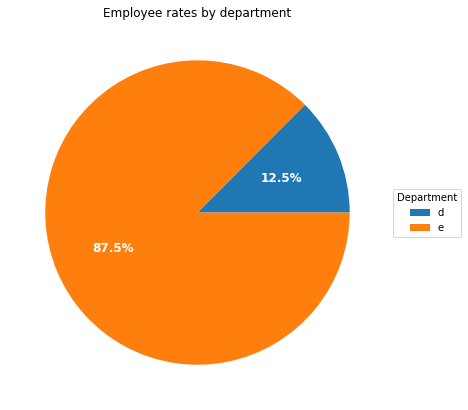

In [33]:
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(aspect="equal"))


data = df_1.groupby(['department']).no_of_workers.sum()



def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)
   
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges,'department',title="Department",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Employee rates by department")

plt.show()

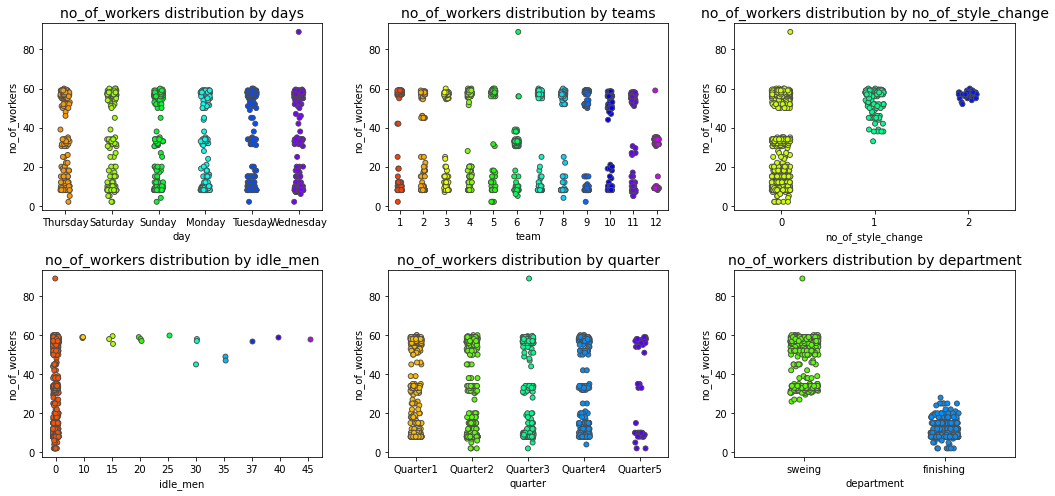

In [34]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(2, 3, 1)
sns.stripplot(x = 'day', y = 'no_of_workers', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_workers distribution by days',fontsize= 14)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'team', y = 'no_of_workers', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_workers distribution by teams',fontsize= 14)


plt.subplot(2, 3, 3)
sns.stripplot(x = 'no_of_style_change', y = 'no_of_workers', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_workers distribution by no_of_style_change',fontsize= 14)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'idle_men', y = 'no_of_workers', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_workers distribution by idle_men',fontsize= 14)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'quarter', y = 'no_of_workers', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_workers distribution by quarter',fontsize= 14)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'department', y = 'no_of_workers', data = df_1,linewidth = 0.9, palette = palette)
plt.title('no_of_workers distribution by department',fontsize= 14)

plt.tight_layout()

# 13-Actual Productivity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


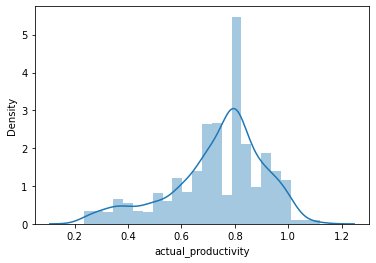

In [35]:
sns.distplot(df_1.actual_productivity)

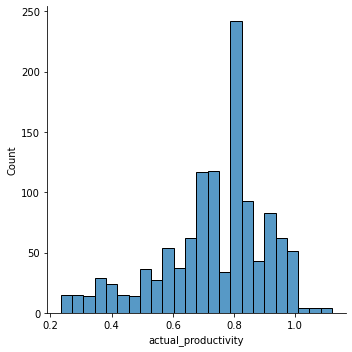

In [36]:
sns.displot(df['actual_productivity'])

Although the code for the two graphs above is the same, why are they different?

# Actual vs Targeted Productivity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


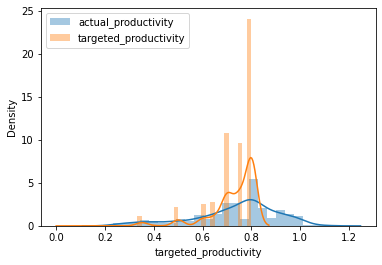

In [37]:
sns.distplot(df_1.actual_productivity,label='actual_productivity')
sns.distplot(df_1.targeted_productivity,label='targeted_productivity')
plt.legend(loc=0)

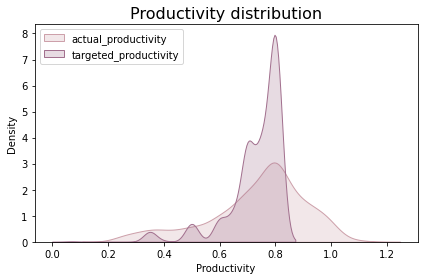

In [38]:
sns.kdeplot(df_1['actual_productivity'], shade=True,  color='#cda0aa', label='actual_productivity')
sns.kdeplot(df_1["targeted_productivity"], shade=True,color='#a2708e', label = 'targeted_productivity')
plt.title('Productivity distribution',fontsize= 16)
plt.xlabel('Productivity')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Actual_Productivity of Teams')

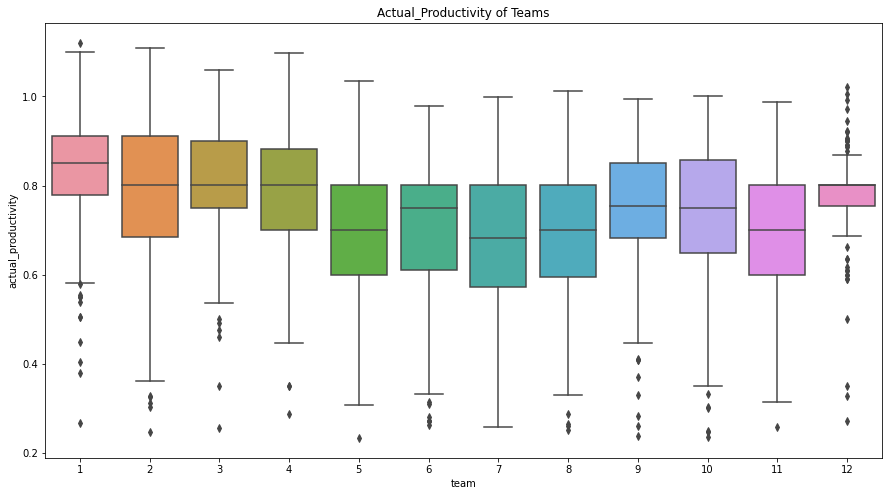

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(x='team',y='actual_productivity', data=df_1)
plt.title('Actual_Productivity of Teams')

According to this Graph 5th, 7th,8th and 11th Teams are the worst

All Teams needed to be improved

Text(0.5, 1.0, 'Targeted_Productivity of Teams')

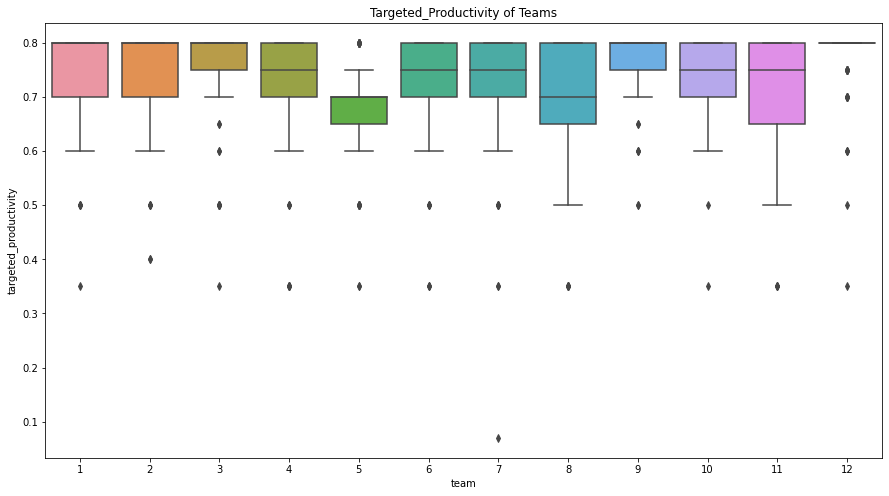

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x='team',y='targeted_productivity', data=df_1)
plt.title('Targeted_Productivity of Teams')

# Correlation Heatmap

In [41]:
corr=df_1.corr()
mask=np.zeros(corr.shape,dtype=bool)
mask[np.triu_indices(len(mask))]=True


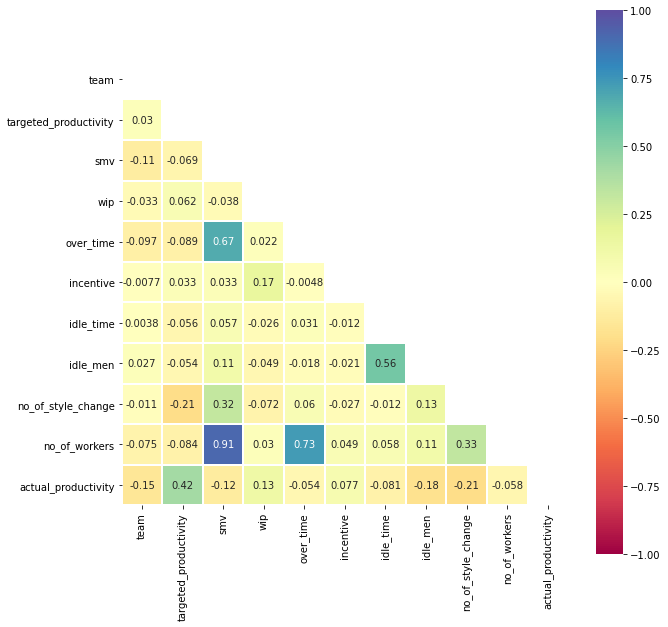

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Spectral',square=True,mask=mask,linecolor='white',linewidths=1)

In [43]:
df_1.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

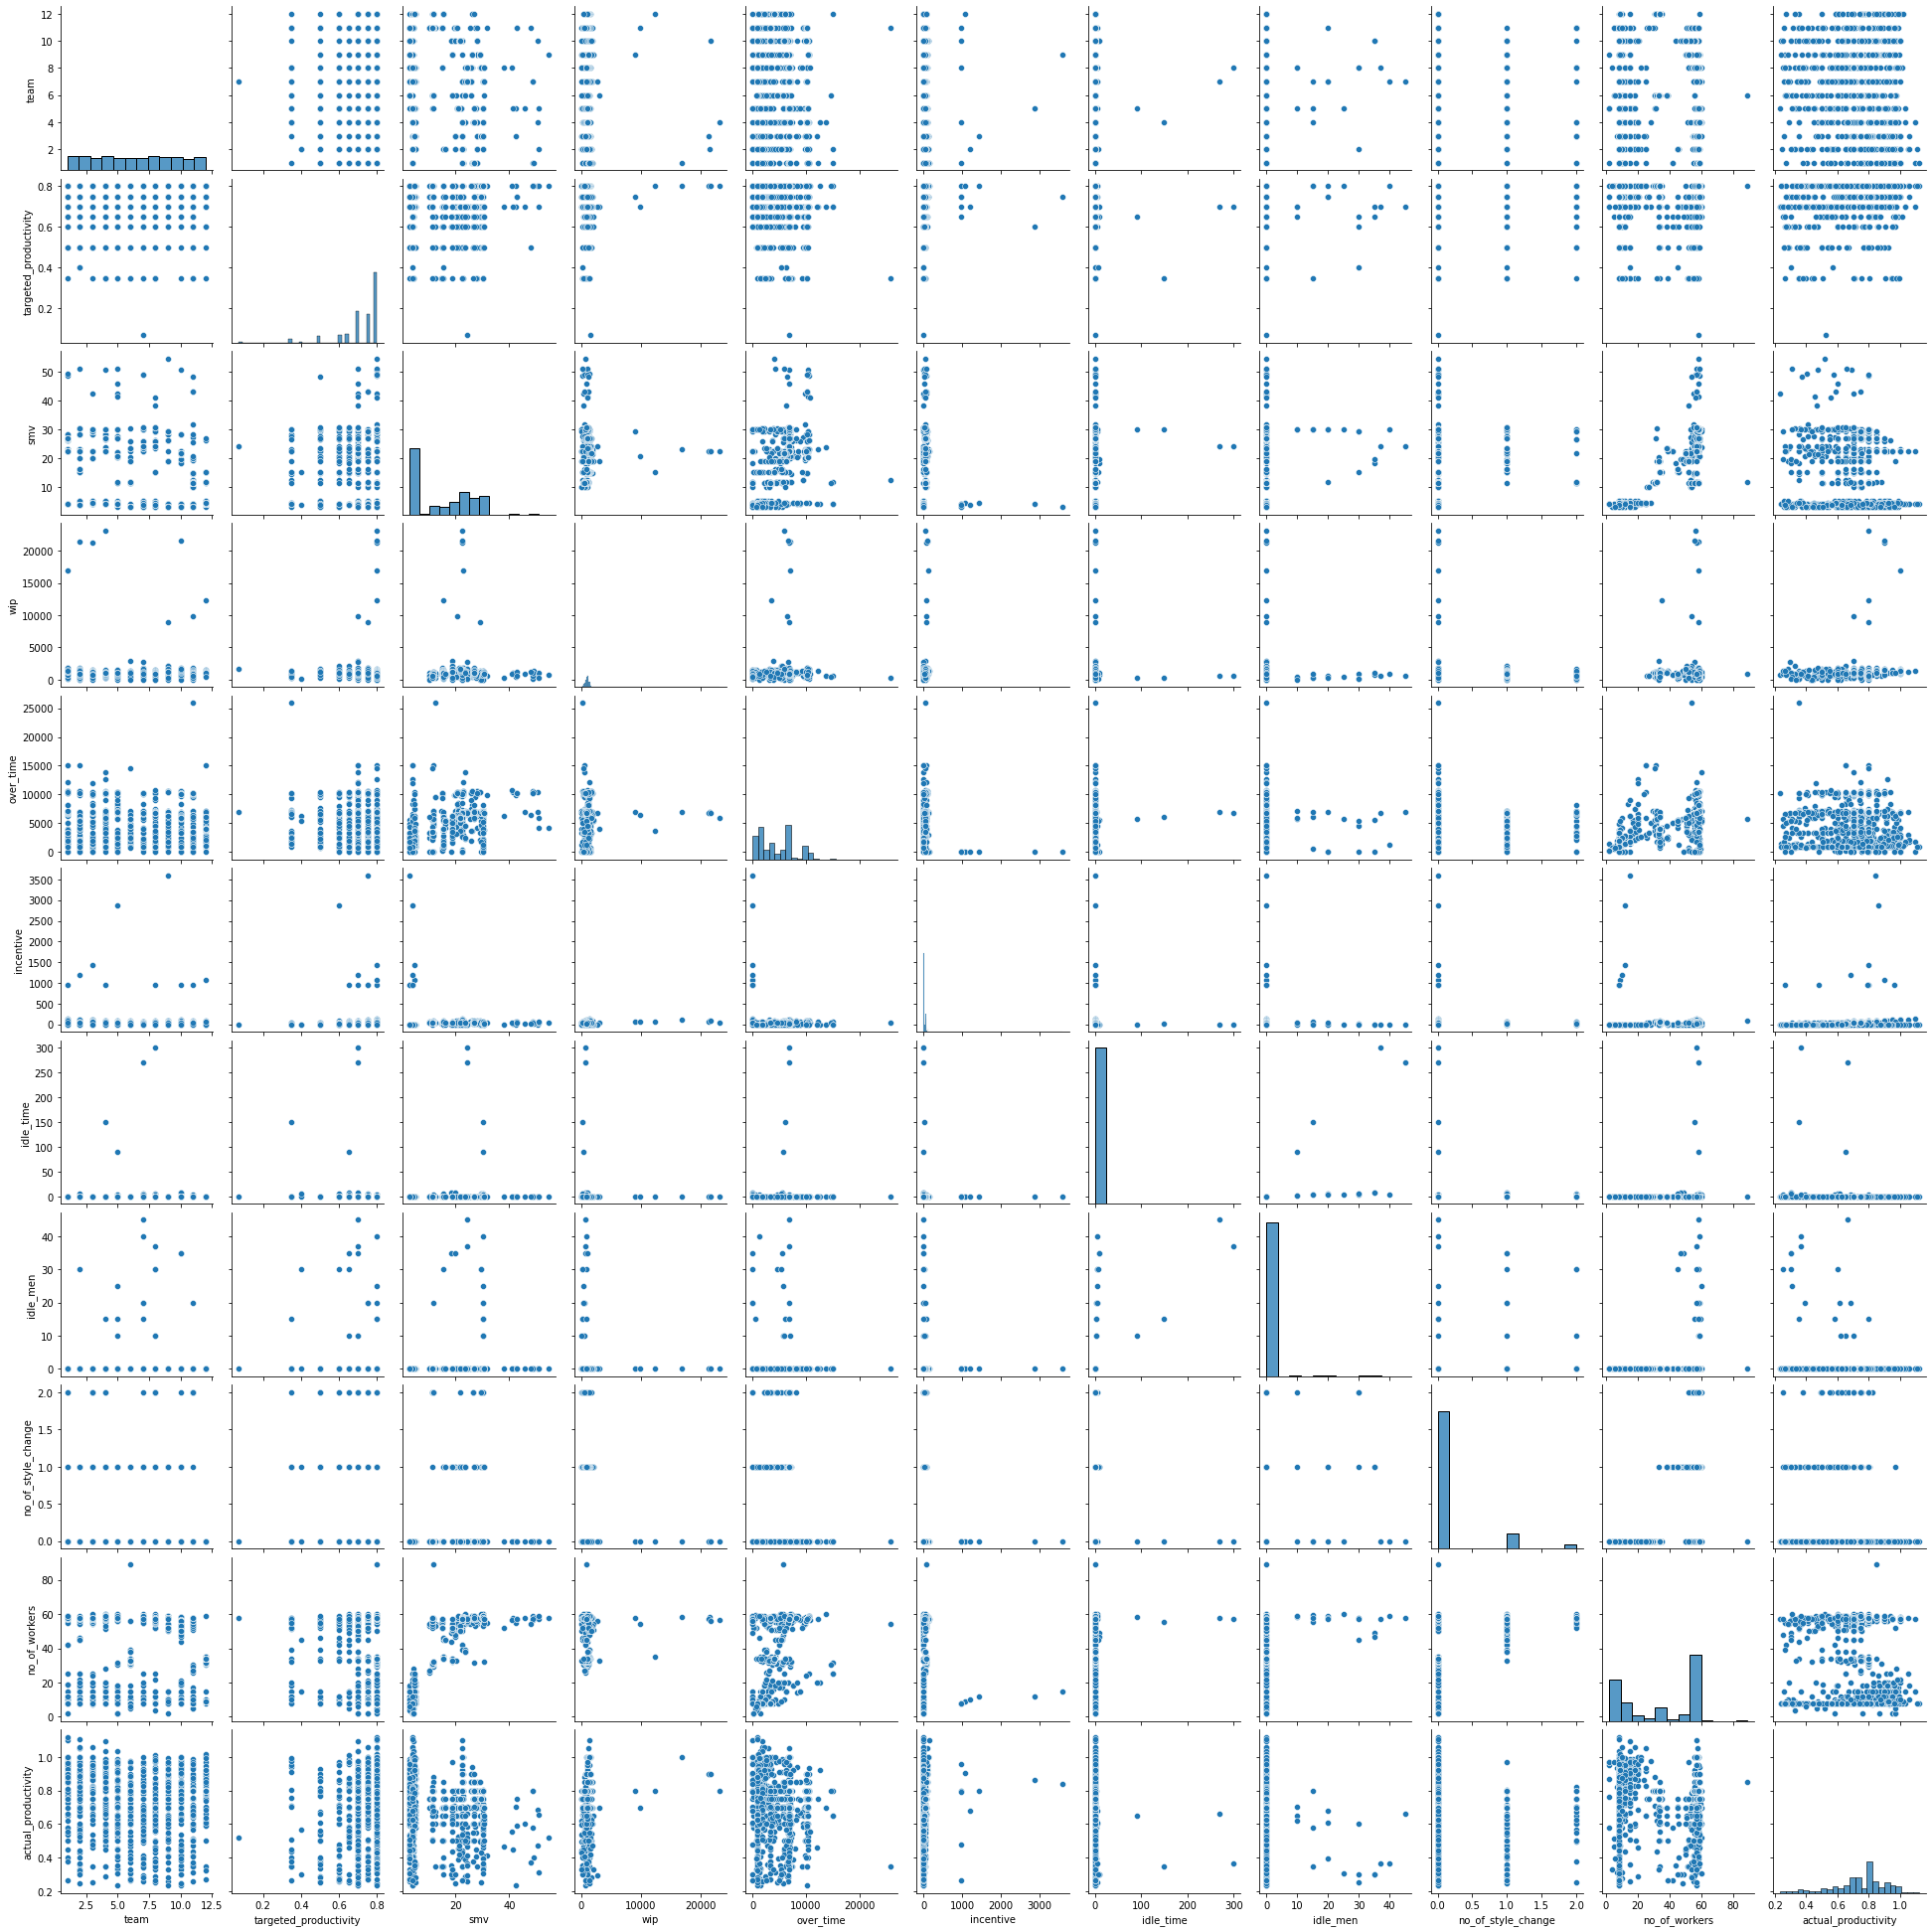

In [44]:
sns.pairplot(df_1)

In [45]:
df.skew().sort_values(ascending=True)

targeted_productivity    -2.144150
actual_productivity      -0.807492
no_of_workers            -0.111740
team                      0.009848
smv                       0.405937
over_time                 0.673287
no_of_style_change        2.942506
wip                       9.741786
idle_men                  9.855079
incentive                15.790746
idle_time                20.545425
dtype: float64

In [46]:
dif=df_1.targeted_productivity-df_1.actual_productivity
dif

0      -0.140725
1      -0.136500
2      -0.000570
3      -0.000570
4      -0.000382
          ...   
1192    0.121667
1193    0.074375
1194    0.024375
1195    0.244111
1196    0.305278
Length: 1197, dtype: float64

dif value should be minimized